<a href="https://colab.research.google.com/github/zlatte1/ds22_project/blob/main/Neuralnetwork02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf

In [20]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense
from scikeras.wrappers import KerasRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [22]:
# Load the dataset
df=pd.read_csv('https://raw.githubusercontent.com/zlatte1/ds22_project/main/data/mvoies_processed_noTitle.csv')

In [23]:
# Select the column to predict
target_col = 'Rating'
X = df.drop(target_col, axis=1).values
y = df[target_col].values.reshape(-1, 1)

In [8]:
# Split the dataset into train and test sets and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)                                              


In [9]:
# Scale and transform the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled =scaler.transform(X_val)


In [10]:
# Define the Keras model
model = keras.Sequential([
keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
keras.layers.Dense(32, activation='relu'),
keras.layers.Dense(1, activation='linear')])  

# we chose 'linear' because its regression problem (for binary classification problem it could be 'sigmoid') func.)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
  


In [11]:
# Fit the model to the training data
history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
29/29 [==============================] - 1s 6ms/step - loss: 33.4800 - mse: 33.4800 - val_loss: 16.7449 - val_mse: 16.7449
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 9.2386 - mse: 9.2386 - val_loss: 3.6026 - val_mse: 3.6026
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 3.2840 - mse: 3.2840 - val_loss: 2.1057 - val_mse: 2.1057
Epoch 4/10
29/29 [==============================] - 0s 3ms/step - loss: 2.0087 - mse: 2.0087 - val_loss: 1.4812 - val_mse: 1.4812
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 1.4074 - mse: 1.4074 - val_loss: 1.2469 - val_mse: 1.2469
Epoch 6/10
29/29 [==============================] - 0s 2ms/step - loss: 1.1278 - mse: 1.1278 - val_loss: 1.1242 - val_mse: 1.1242
Epoch 7/10
29/29 [==============================] - 0s 2ms/step - loss: 0.9601 - mse: 0.9601 - val_loss: 1.0389 - val_mse: 1.0389
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.8513 - mse: 

In [13]:
# Evaluate your model on the test set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse =np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Test MSE:', mse)
print('Test RMSE:', rmse)
print('Test R2:', r2)


12/12 [==============================] - 0s 2ms/step
Test MSE: 2.6746461771832237
Test RMSE: 1.6354345530112857
Test R2: -2.191012391297763


In [16]:
# Evaluate the model on validation set
y_predv = model.predict(X_val_scaled)
mse_val = mean_squared_error(y_val, y_predv)
rmse_val =np.sqrt(mse_val)
r2 = r2_score(y_val, y_predv)

print('Validation MSE:', mse_val)
print('Validation RMSE:', rmse_val)
print('Validation R2:', r2)

10/10 [==============================] - 0s 1ms/step
Validation MSE: 0.9723931377164768
Validation RMSE: 0.9860999633487859
Validation R2: -0.3052692287807559


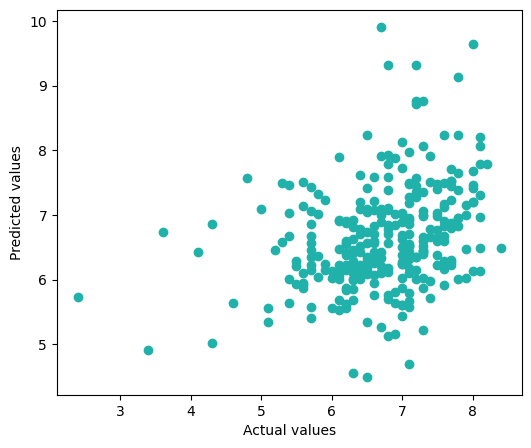

In [37]:

fig = plt.figure(figsize=(6, 5))
# Plot predicted vs. actual values
plt.scatter(y_val, y_predv, color='lightseagreen')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()



In [ ]:
# lightseagreen